In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [4]:
#Loading Dataset
data=pd.read_csv('./DATA/retail_data.csv')
data

Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362160e+09             4133 Young Canyon   
3               Mary34@gmail.com  2.776752e+09   8148 Thomas Creek Suite 100   
4            Charles30@gmail.com  9.098268e+09     5813 Lori Ports Suite 269   
...                          ...           ...                           ...   
302005      Courtney60@gmail.com  7.466354e+09        389 Todd Path Apt. 159   
302006      Jennifer71@gmail.com  5.754305e+09             52809 Mark Forges   
302007  Christopher100@gmail.com  9.382530e+09  407 Aaron Crossing Suite 495   
302008       Rebecca65@gmail.com  9.373222e+09               3204 Baird Port   
302009       William14@gmail.com  9.518927e+09           143 Amanda Crescent   

              City            State  Zipcode    Country  ...  Total_Amount  \
0         Dortmund           Berlin  77985.0    Germany  ...    324.086270   
1       Nottingham          England  99071.0         UK  ...    806.707815   
2          Geelong  New South Wales  75929.0  Australia  ...   1063.432799   
3         Edmonton          Ontario  88420.0     Canada  ...   2466.854021   
4          Bristol          England  48704.0         UK  ...    248.553049   
...            ...              ...      ...        ...  ...           ...   
302005  Townsville  New South Wales   4567.0  Australia  ...    973.962984   
302006     Hanover           Berlin  16852.0    Germany  ...    285.137301   
302007    Brighton          England  88038.0         UK  ...    182.105285   
302008     Halifax          Ontario  67608.0     Canada  ...    120.834784   
302009      Tucson    West Virginia  25242.0        USA  ...   2382.233417   

       Product_Category  Product_Brand Product_Type   Feedback  \
0              Clothing           Nike       Shorts  Excellent   
1           Electronics        Samsung       Tablet  Excellent   
2                 Books  Penguin Books   Children's    Average   
3            Home Decor     Home Depot        Tools  Excellent   
4               Grocery         Nestle    Chocolate        Bad   
...                 ...            ...          ...        ...   
302005            Books  Penguin Books      Fiction        Bad   
302006      Electronics          Apple       Laptop  Excellent   
302007         Clothing         Adidas       Jacket    Average   
302008       Home Decor           IKEA    Furniture       Good   
302009       Home Decor     Home Depot  Decorations    Average   

        Shipping_Method Payment_Method Order_Status  Ratings  \
0              Same-Day     Debit Card      Shipped      5.0   
1              Standard    Credit Card   Processing      4.0   
2              Same-Day    Credit Card   Processing      2.0   
3              Standard         PayPal   Processing      4.0   
4              Standard           Cash      Shipped      1.0   
...                 ...            ...          ...      ...   
302005         Same-Day           Cash   Processing      1.0   
302006         Same-Day           Cash   Processing      5.0   
302007          Expr

In [5]:
#converting 'Date' column in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [6]:
# Handle missing values

# Fill missing 'Date' with a specific date (reference_date)
reference_date = data['Date'].max()
data['Date'].fillna(reference_date, inplace=True)

# Fill missing numeric values with median
data.fillna({
    'Total_Purchases': data['Total_Purchases'].median(),
    'Amount': data['Amount'].median(),
    'Total_Amount': data['Total_Amount'].median()
}, inplace=True)


In [7]:
# Drop rows where 'Customer_ID' or 'Transaction_ID' are missing
data.dropna(subset=['Customer_ID', 'Transaction_ID'], inplace=True)

In [8]:
# Calculate Recency, Frequency, and Monetary value (RFM)
rfm = data.groupby('Customer_ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Total_Amount': 'sum'  # Monetary Value
})

In [9]:
# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [10]:
# Check for NaNs in rfm
print("NaNs in RFM DataFrame before scaling:")
print(rfm.isna().sum())

NaNs in RFM DataFrame before scaling:
Recency      0
Frequency    0
Monetary     0
dtype: int64


In [11]:
# Handle any NaNs in the RFM DataFrame
# Fill NaNs with the median of each column
rfm.fillna(rfm.median(), inplace=True)

In [12]:
# Verify there are no more NaNs
print("NaNs in RFM DataFrame after handling:")
print(rfm.isna().sum())

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

NaNs in RFM DataFrame after handling:
Recency      0
Frequency    0
Monetary     0
dtype: int64


In [13]:
# Check for NaNs in scaled data
print("NaNs in scaled RFM data:")
print(pd.DataFrame(rfm_scaled).isna().sum())

NaNs in scaled RFM data:
0    0
1    0
2    0
dtype: int64


In [14]:
# Apply K-Means Clustering
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

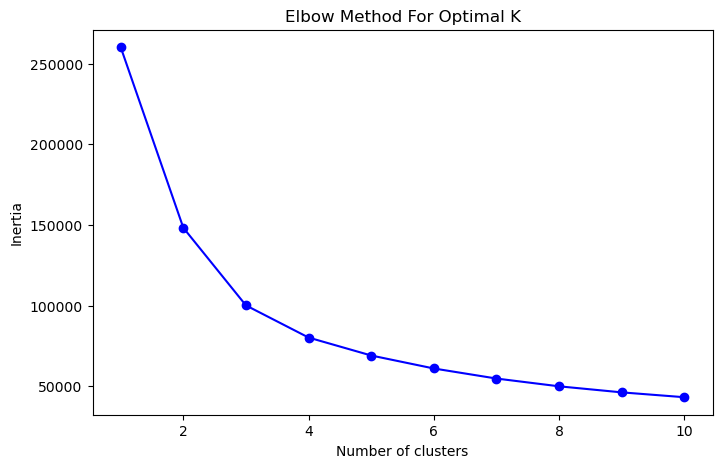

In [15]:
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [16]:

# Fit K-Means with optimal number of clusters (assume k=4 based on elbow method)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

C:\Users\Atharva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
##Define cluster names based on the characteristics of each cluster center
def assign_cluster_name(cluster_id):
    if cluster_id == 0:
        return "Churned High Spenders"
    elif cluster_id == 1:
        return "Frequent High Spenders"
    elif cluster_id == 2:
        return "Infrequent Low Spenders"
    elif cluster_id == 3:
        return "Moderate Spenders"
    
    # Map cluster IDs to names
rfm['Cluster_Name'] = rfm['Cluster'].apply(assign_cluster_name)
rfm


Recency  Frequency     Monetary  Cluster             Cluster_Name
Customer_ID                                                                   
10000.0          102          4  5007.566357        3        Moderate Spenders
10001.0          104          5  8136.462824        3        Moderate Spenders
10002.0           94          5  4104.013951        3        Moderate Spenders
10003.0          227          2  2340.496447        2  Infrequent Low Spenders
10004.0           30          2  2356.516683        0    Churned High Spenders
...              ...        ...          ...      ...                      ...
99995.0           97          8  9909.700258        1   Frequent High Spenders
99996.0           63          4  5414.433873        3        Moderate Spenders
99997.0           51          4  6092.733546        3        Moderate Spenders
99998.0            4          5  6849.837983        3        Moderate Spenders
99999.0          152          2  5544.688490        2  Infrequent Low Spenders

[86753 rows x 5 columns]

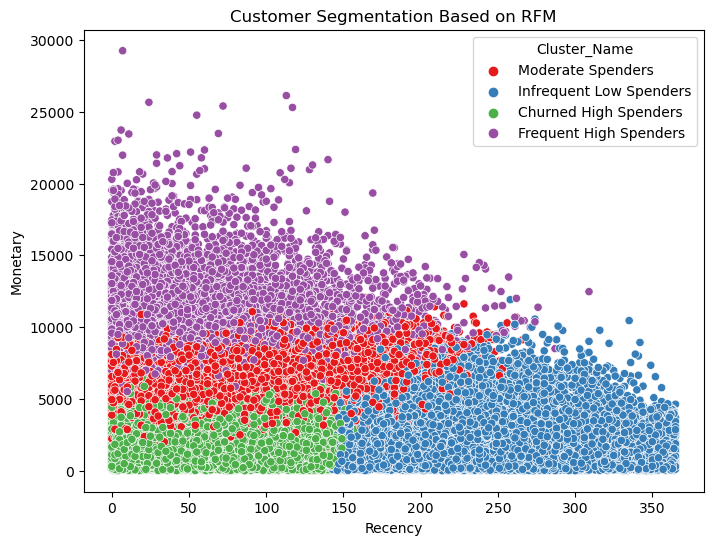

In [18]:
# Analyze and visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster_Name', data=rfm, palette='Set1')
plt.title('Customer Segmentation Based on RFM')
plt.show()

In [23]:
# View the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency', 'Monetary'])
cluster_centers['Cluster'] = cluster_centers.index
print("Cluster Centers with Names:")
for i, row in cluster_centers.iterrows():
    print(f"\nCluster {i}: {assign_cluster_name(i)}")
    print(f"  Recency: {row['Recency']} days since last purchase")
    print(f"  Frequency: {row['Frequency']} transactions")
    print(f"  Monetary: ${row['Monetary']} total spent")

Cluster Centers with Names:

Cluster 0: Churned High Spenders
  Recency: -0.36691200742244523 days since last purchase
  Frequency: -0.6377497606308747 transactions
  Monetary: $-0.6901527873816207 total spent

Cluster 1: Frequent High Spenders
  Recency: -0.569023536388862 days since last purchase
  Frequency: 1.6142053136081649 transactions
  Monetary: $1.7146943044523757 total spent

Cluster 2: Infrequent Low Spenders
  Recency: 1.6088598059277612 days since last purchase
  Frequency: -0.8694093123016297 transactions
  Monetary: $-0.6968322052361198 total spent

Cluster 3: Moderate Spenders
  Recency: -0.3806895323471141 days since last purchase
  Frequency: 0.4335211251700359 transactions
  Monetary: $0.3380873942746513 total spent


In [27]:
fig = px.scatter_3d(rfm, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster_Name',
                    title='Customer Segmentation in 3D',
                    labels={'Recency': 'Recency (Days)', 'Frequency': 'Frequency', 'Monetary': 'Monetary ($)', 'Cluster_Name': 'Cluster'},
                    color_discrete_map={
                        'Moderate Spenders': 'red',
                        'Infrequent Low Spenders': 'blue',
                        'Churned High Spenders': 'green',
                        'Frequent High Spenders': 'purple'
                    })
fig.update_traces(marker=dict(size=2, opacity=1, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

In [21]:
rfm_sample = rfm.sample(frac=0.1, random_state=42)

In [28]:
fig = px.scatter_3d(rfm_sample, x='Recency', y='Frequency', z='Monetary',
                    color='Cluster_Name',
                    title='Customer Segmentation in 3D',
                    labels={'Recency': 'Recency (Days)', 'Frequency': 'Frequency', 'Monetary': 'Monetary ($)', 'Cluster_Name': 'Cluster'},
                    color_discrete_map={
                        'Moderate Spenders': 'red',
                        'Infrequent Low Spenders': 'blue',
                        'Churned High Spenders': 'green',
                        'Frequent High Spenders': 'purple'
                    })
fig.update_traces(marker=dict(size=2, opacity=1, line=dict(width=1, color='DarkSlateGrey')))
fig.show()